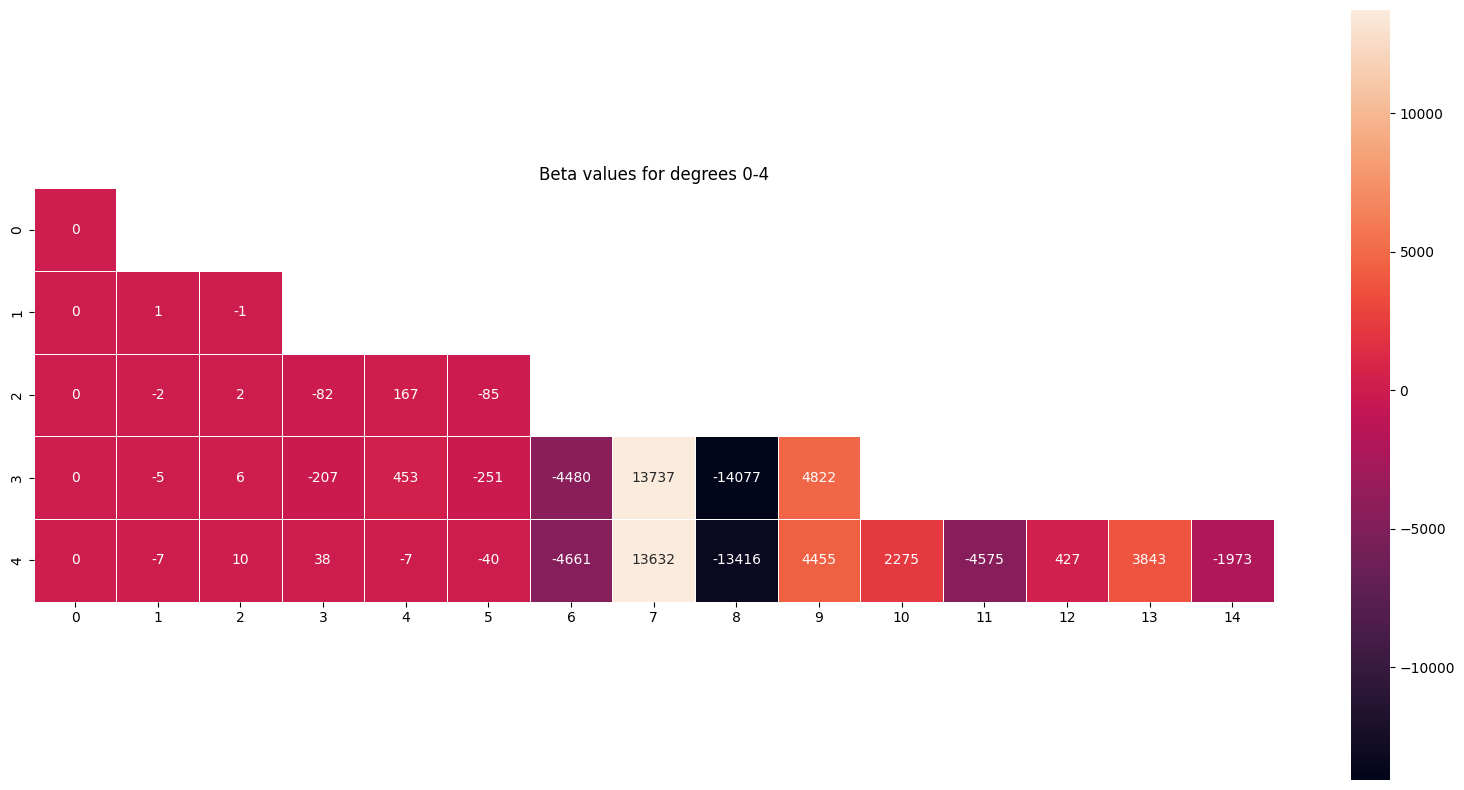

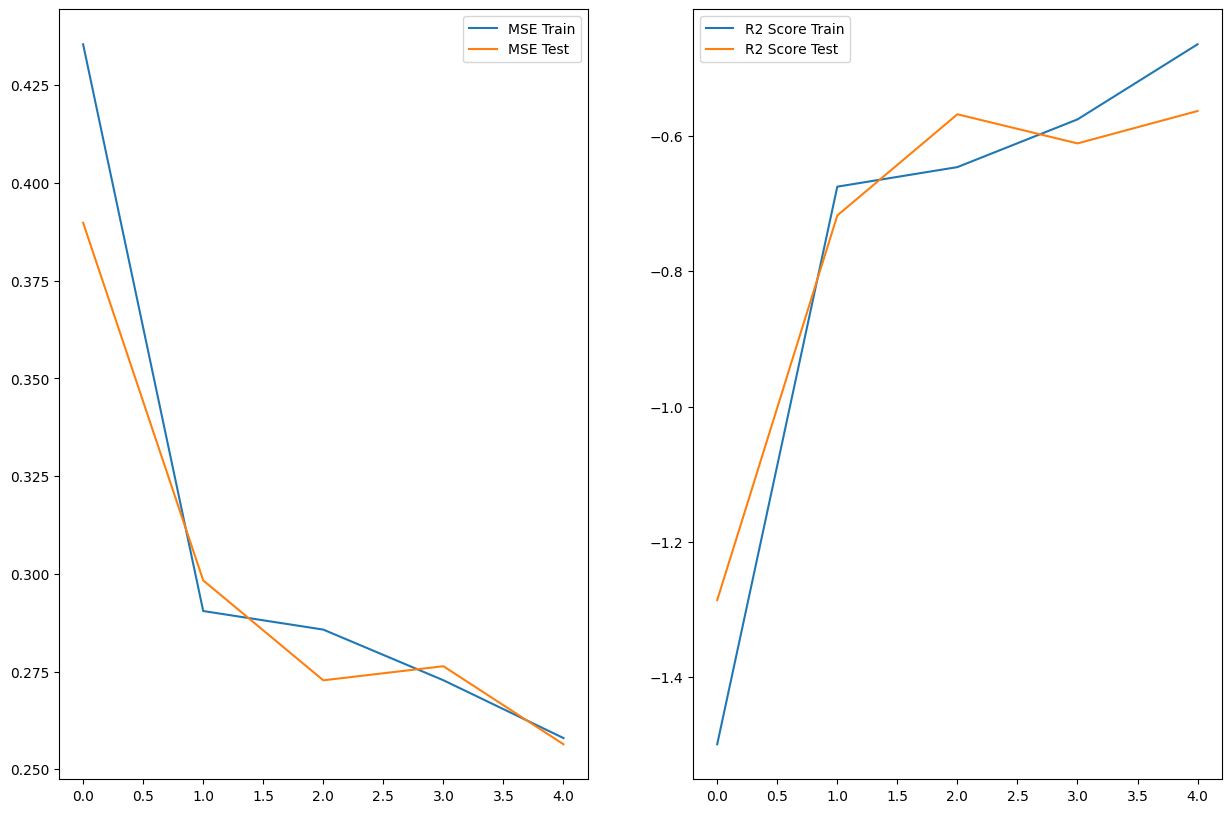

In [16]:
#Step A

# Common imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Franke's function definition, inputs x and y values returns z value
def FrankeFunction(x,y):
	term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
	term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
	term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
	term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
	return term1 + term2 + term3 + term4

# Create the design matrix for the n-th polinomial degree.
def create_X(x, y, n):
	if len(x.shape) > 1:
		x = np.ravel(x)
		y = np.ravel(y)

	N = len(x)
	l = int((n+1)*(n+2)/2)		# Number of elements in beta
	X = np.ones((N,l))

	for i in range(1,n+1):
		q = int((i)*(i+1)/2)
		for k in range(i+1):
			X[:,q+k] = (x**(i-k))*(y**k)

	return X

#Define the R2 score function
def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)


# Defining the number of the polinomial degrees and number of data points used
n = 5
N = 1000
x = np.sort(np.random.uniform(0, 1, N))
y = np.sort(np.random.uniform(0, 1, N))
z = FrankeFunction(x, y)
mse_train = np.zeros(n)
r2_train = np.zeros(n)
beta_val = np.zeros(n)

mse_test = np.zeros(n)
r2_test = np.zeros(n)

beta = []

#Base implementation of OLS

for degree in range(0, n):
	#Create the Design matrix X with polinomial degree = degree
    X = create_X(x, y, degree)    
    # split in training and test data
    X_train, X_test, y_train, y_test = train_test_split(X,z,test_size=0.2)

    #Scaling the data
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    #Calculating the beta paramenter using the standard OLS formula (X^TX)^-1X^Ty
    beta.append(list((np.linalg.pinv(X_train_scaled.T @ X_train_scaled) @ X_train_scaled .T) @ y_train))

    #Predicting the values using the formula X * Beta for test and train data
    y_tilde_train = X_train_scaled @ beta[degree]
    y_tilde_test = X_test_scaled @ beta[degree]

    #Calculating MSE and R2 Score for train prediction
    mse_train[degree] = np.mean( np.mean((y_train - y_tilde_train)**2))
    r2_train[degree] = R2(y_train, y_tilde_train)
	
    #Calculating MSE and R2 Score for test prediction
    mse_test[degree] = np.mean( np.mean((y_test - y_tilde_test)**2))
    r2_test[degree] = R2(y_test, y_tilde_test)

#Plotting the Beta values in a heatmap

# Square the beta matrix so that it becomes a NxN square matrix
plt.figure(figsize=(20,10))
max_length = max(len(row) for row in beta)
for row in beta:
    while len(row) < max_length:
        row.append(np.nan)

#Plot the values
plt.xlabel("Features")
plt.ylabel("Degrees")
plt.title("Beta values for degrees 0-4")
sns.heatmap(beta, annot=True, fmt=".0f", linewidths=.5, square=True)




plt.show()

#Plot the MSE and R2 scores for the test and training data sets
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.plot(range(0, n), mse_train, label = "MSE Train")
plt.plot(range(0, n), mse_test, label = "MSE Test")
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(0, n), r2_train, label = "R2 Score Train")
plt.plot(range(0, n), r2_test, label = "R2 Score Test")
plt.legend()
plt.show()

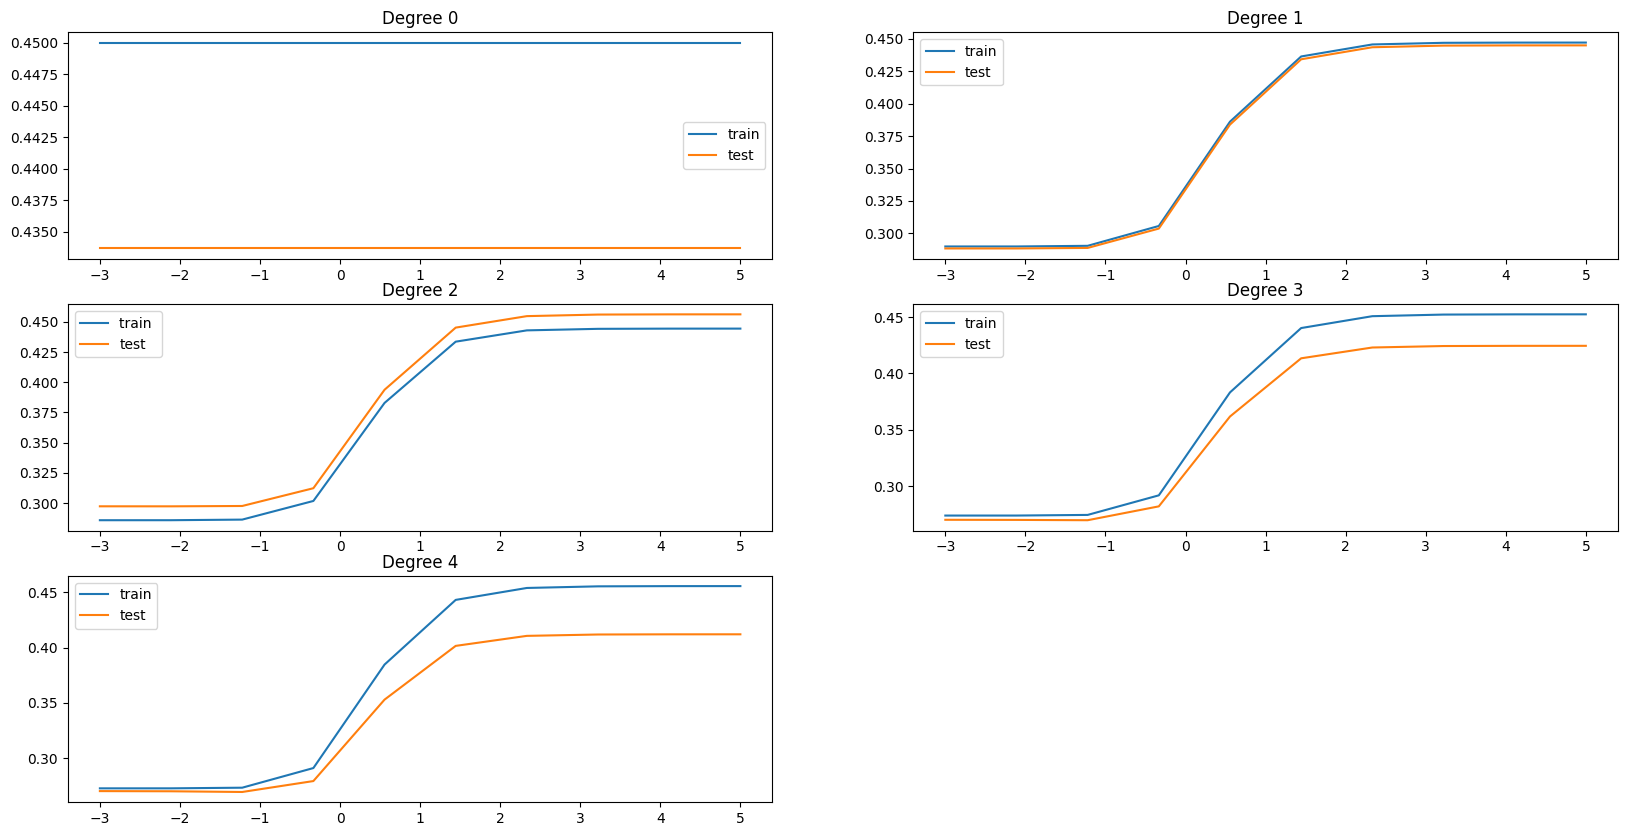

In [17]:
#Step B

# Common imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler

# Franke's function definition, inputs x and y values returns z value
def FrankeFunction(x,y):
	term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
	term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
	term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
	term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
	return term1 + term2 + term3 + term4

# Create the design matrix for the n-th polinomial degree.
def create_X(x, y, n ):
	if len(x.shape) > 1:
		x = np.ravel(x)
		y = np.ravel(y)

	N = len(x)
	l = int((n+1)*(n+2)/2)		# Number of elements in beta
	X = np.ones((N,l))

	for i in range(1,n+1):
		q = int((i)*(i+1)/2)
		for k in range(i+1):
			X[:,q+k] = (x**(i-k))*(y**k)

	return X

#Define the R2 score function
def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)


# Defining the number of the polinomial degrees and number of data points used
n = 5
N = 1000
x = np.sort(np.random.uniform(0, 1, N))
y = np.sort(np.random.uniform(0, 1, N))
z = FrankeFunction(x, y)
# Defining the number of lambda values to use
nlambdas = 10
mse_train = np.zeros((n,nlambdas))
r2_train = np.zeros((n,nlambdas))
beta_val = np.zeros(n)

mse_test = np.zeros((n,nlambdas))
r2_test = np.zeros((n,nlambdas))



#Creating lambda values using nlambdas as value e.g. 10, ranging from -3 to 5
lambdas = np.logspace(-3,5, nlambdas)

#Base implementation of Ridge

for degree in range(0, n):
	#Create the Design matrix X with polinomial degree = degree
    X = create_X(x, y, degree)    
    # split in training and test data
    X_train, X_test, y_train, y_test = train_test_split(X,z,test_size=0.2)


    #Scaling the data
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
	
    i = 0
	
    #For each degree test each lambda value
    for lmb in lambdas:
		#Calculate beta value using the formula (X^TX+lambdaI)^-1X^Ty
        beta = (list((np.linalg.pinv(X_train_scaled.T @ X_train_scaled + lmb * (X_train_scaled.T @ X_train_scaled)) @ X_train_scaled .T) @ y_train))
        
        #Predict the values
        y_tilde_train = X_train_scaled @ beta
        y_tilde_test = X_test_scaled @ beta


        #Calculate the MSE and R2 Score for Train prediction
        mse_train[degree, i] = np.mean( np.mean((y_train - y_tilde_train)**2))
        r2_train[degree, i] = R2(y_train, y_tilde_train)
		
        #Calculate the MSE and R2 Score for Test prediction
        mse_test[degree, i] = np.mean( np.mean((y_test - y_tilde_test)**2))
        r2_test[degree, i] = R2(y_test, y_tilde_test)

        i+=1	
	
plt.figure(figsize=(20,10))
plt.subplot(3,2,1)
plt.plot(np.log10(lambdas), mse_train[0], label = 'train')
plt.plot(np.log10(lambdas), mse_test[0], label = 'test')
plt.legend()
plt.title("Degree 0")
plt.subplot(3,2,2)
plt.plot(np.log10(lambdas), mse_train[1], label = 'train')
plt.plot(np.log10(lambdas), mse_test[1], label = 'test')
plt.legend()
plt.title("Degree 1")
plt.subplot(3,2,3)
plt.plot(np.log10(lambdas), mse_train[2], label = 'train ')
plt.plot(np.log10(lambdas), mse_test[2], label = 'test')
plt.legend()
plt.title("Degree 2")
plt.subplot(3,2,4)
plt.plot(np.log10(lambdas), mse_train[3], label = 'train')
plt.plot(np.log10(lambdas), mse_test[3], label = 'test')
plt.legend()
plt.title("Degree 3")
plt.subplot(3,2,5)
plt.plot(np.log10(lambdas), mse_train[4], label = 'train')
plt.plot(np.log10(lambdas), mse_test[4], label = 'test')
plt.legend()
plt.title("Degree 4")
plt.show()

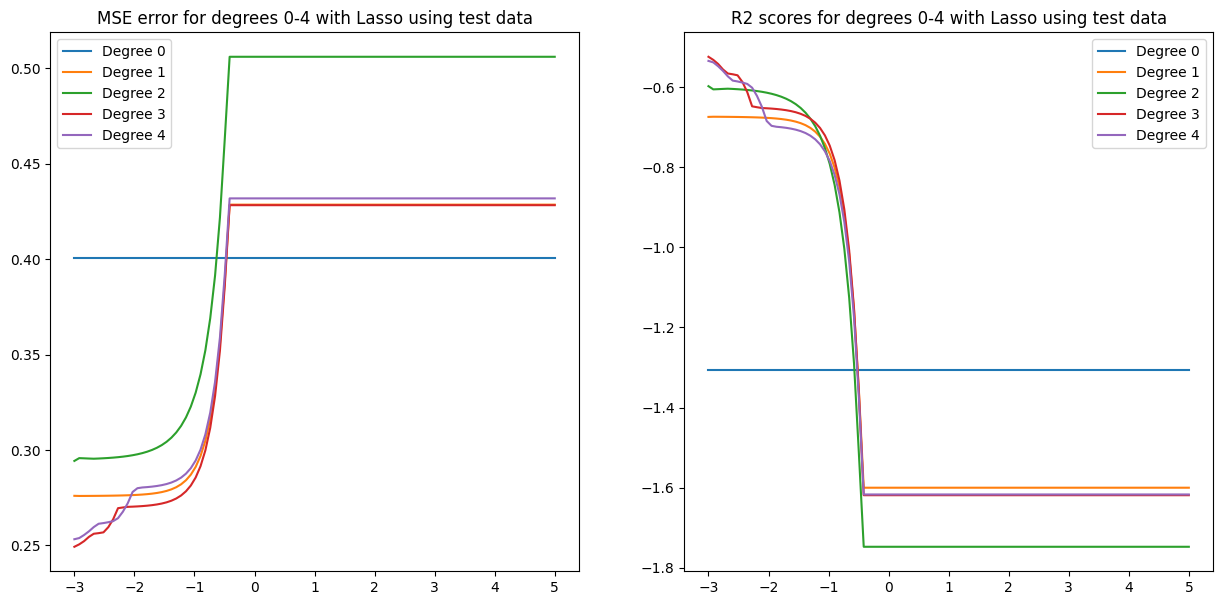

In [8]:
#Step C
# Common imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning

# Where to save the figures and data files
def FrankeFunction(x,y):
	term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
	term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
	term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
	term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
	return term1 + term2 + term3 + term4


def create_X(x, y, n ):
	if len(x.shape) > 1:
		x = np.ravel(x)
		y = np.ravel(y)

	N = len(x)
	l = int((n+1)*(n+2)/2)		# Number of elements in beta
	X = np.ones((N,l))

	for i in range(1,n+1):
		q = int((i)*(i+1)/2)
		for k in range(i+1):
			X[:,q+k] = (x**(i-k))*(y**k)

	return X

def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)


simplefilter("ignore", category=ConvergenceWarning)


# Making meshgrid of datapoints and compute Franke's function
n = 5
N = 1000
x = np.sort(np.random.uniform(0, 1, N))
y = np.sort(np.random.uniform(0, 1, N))
z = FrankeFunction(x, y)
mse_train = np.zeros((n,100))
r2_train = np.zeros((n,100))
beta_val = np.zeros(n)

mse_test = np.zeros((n, 100))
r2_test = np.zeros((n,100))

nlambdas = 100
lambdas = np.logspace(-3,5, nlambdas)

#Base implementation of Lasso

for degree in range(0, n):
	#Create the Design matrix X with polinomial degree = degree
    X = create_X(x, y, degree)    
    # split in training and test data
    X_train, X_test, y_train, y_test = train_test_split(X,z,test_size=0.2)


    #Scaling the data
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
	
    i = 0
	
	#For each degree test each lambda value
    for lmb in lambdas:

        #calculate the beta value using sklearn.Ridge
        RegLasso = Lasso(lmb, fit_intercept=False)
        RegLasso.fit(X_train_scaled,y_train)
		
        #Predict values with train and test data
        y_tilde_train = RegLasso.predict(X_train_scaled)
        y_tilde_test = RegLasso.predict(X_test_scaled)
		
        #Calculate MSE and R2 Score for Train data
        mse_train[degree,i] = np.mean( np.mean((y_train - y_tilde_train)**2))
        r2_train[degree,i] = R2(y_train, y_tilde_train)

        #Calculate MSE and R2 Score for Test data
        mse_test[degree,i] = np.mean( np.mean((y_test - y_tilde_test)**2))
        r2_test[degree,i] = R2(y_test, y_tilde_test)

        i+=1

plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.title("MSE error for degrees 0-4 with Lasso using test data")
plt.plot(np.log10(lambdas), mse_test[0], label = "Degree 0")
plt.plot(np.log10(lambdas), mse_test[1], label = "Degree 1")
plt.plot(np.log10(lambdas), mse_test[2], label = "Degree 2")
plt.plot(np.log10(lambdas), mse_test[3], label = "Degree 3")
plt.plot(np.log10(lambdas), mse_test[4], label = "Degree 4")
plt.legend()
plt.subplot(1,2,2)
plt.title("R2 scores for degrees 0-4 with Lasso using test data")
plt.plot(np.log10(lambdas), r2_test[0], label = "Degree 0")
plt.plot(np.log10(lambdas), r2_test[1], label = "Degree 1")
plt.plot(np.log10(lambdas), r2_test[2], label = "Degree 2")
plt.plot(np.log10(lambdas), r2_test[3], label = "Degree 3")
plt.plot(np.log10(lambdas), r2_test[4], label = "Degree 4")
plt.legend()
plt.show()

0.16772043973671022 >= 0.16772043973671016 + 1.1555579666323415e-32 = 0.16772043973671016
0.3113380392196757 >= 0.16655036807953874 + 0.1443164408682658 = 0.31086680894780455
0.3113293638251997 >= 0.1648948162648448 + 0.14843063227816386 = 0.3133254485430087
0.33327655214820184 >= 0.1688619844531111 + 0.1655805425418218 = 0.33444252699493293
0.3266946689973445 >= 0.16523959747182443 + 0.16285015889852633 = 0.32808975637035076


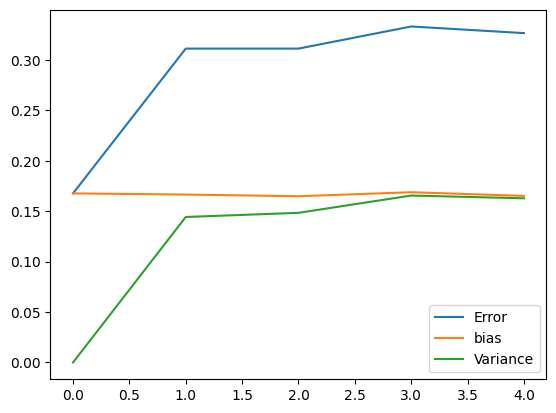

In [9]:
### Step E

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def FrankeFunction(x,y):
	term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
	term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
	term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
	term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
	return term1 + term2 + term3 + term4

# Create the design matrix for the n-th polinomial degree.
def create_X(x, y, n):
	if len(x.shape) > 1:
		x = np.ravel(x)
		y = np.ravel(y)

	N = len(x)
	l = int((n+1)*(n+2)/2)		# Number of elements in beta
	X = np.ones((N,l))

	for i in range(1,n+1):
		q = int((i)*(i+1)/2)
		for k in range(i+1):
			X[:,q+k] = (x**(i-k))*(y**k)

	return X

# Define a function for bootstrap resampling
def bootstrap_resampling(X, y, num_bootstraps):
    mse_bootstrap = np.zeros(num_bootstraps)
    n = X.shape[0]
    y_pred = []

    for i in range(num_bootstraps):
        # Generate random indices with replacement
        indices = np.random.choice(n, n, replace=True)

        # Create the resampled dataset
        X_resampled = X[indices]
        y_resampled = y[indices]

        # Fit the model to the resampled data
        model = LinearRegression()
        model.fit(X_resampled, y_resampled)

        # Make predictions on the original dataset
        y_pred.append(model.predict(X_resampled))

        # Calculate MSE for this bootstrap sample
		
        

    # Calculate the mean and standard deviation of MSE values
    mse_mean = np.mean( np.mean((y - y_pred)**2, axis=1, keepdims=True) )
    mse_std = np.std(mse_bootstrap)
	
    bias = np.mean( (y - np.mean(y_pred, axis=1, keepdims=True))**2 )
    variance = np.mean( np.var(y_pred, axis=1, keepdims=True) )

    return mse_mean, mse_std, bias, variance

# Define the number of bootstrap iterations
num_bootstraps = 100

# define the function parameters
n = 5
N = 1000
x = np.sort(np.random.uniform(0, 1, N))
y = np.sort(np.random.uniform(0, 1, N))
z = FrankeFunction(x, y)
degrees = [0,1,2,3,4]

# Lists to store results
mse_means = []
mse_stds = []
bias_vals = []
variance_vals = []

# Loop over polynomial degrees
for degree in range(n):
    X = create_X(x, y, degree)
    X_train, X_test, y_train, y_test = train_test_split(X,z,test_size=0.2)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Perform bootstrap resampling
    mse_mean, mse_std, bias, variance = bootstrap_resampling(X_train_scaled, y_train, num_bootstraps)

    mse_means.append(mse_mean)
    mse_stds.append(mse_std)
    bias_vals.append(bias)
    variance_vals.append(variance)
    print('{} >= {} + {} = {}'.format(mse_mean, bias, variance, bias+variance))



# Plot the bias-variance trade-off

plt.plot(degrees, mse_means, label='Error')
plt.plot(degrees, bias_vals, label='bias')
plt.plot(degrees, variance_vals, label='Variance')
plt.legend()
plt.show()


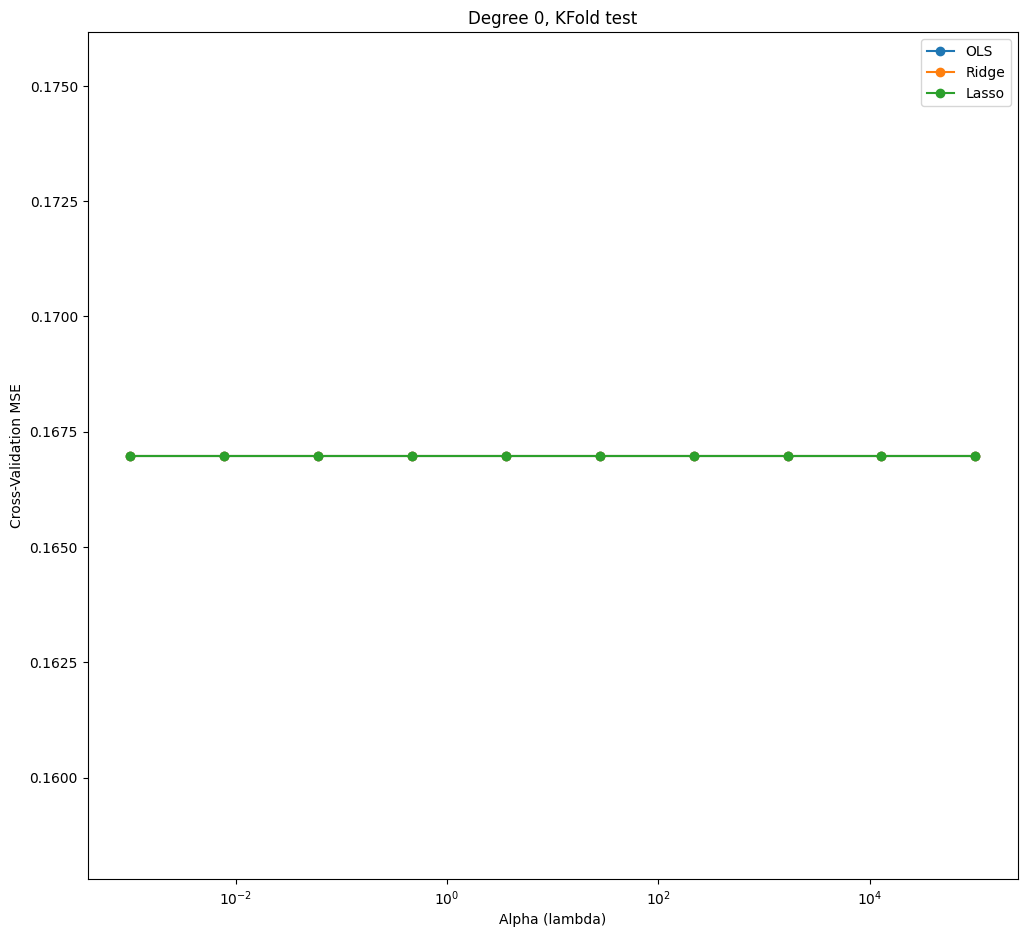

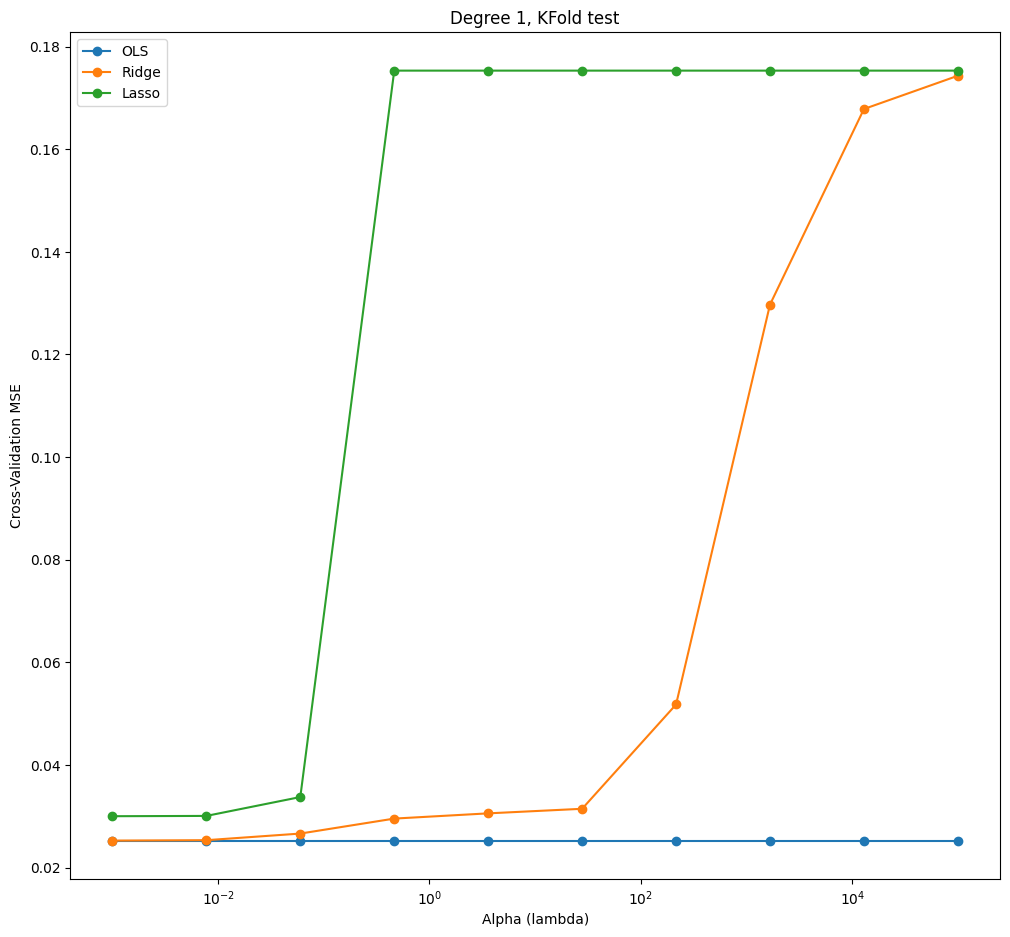

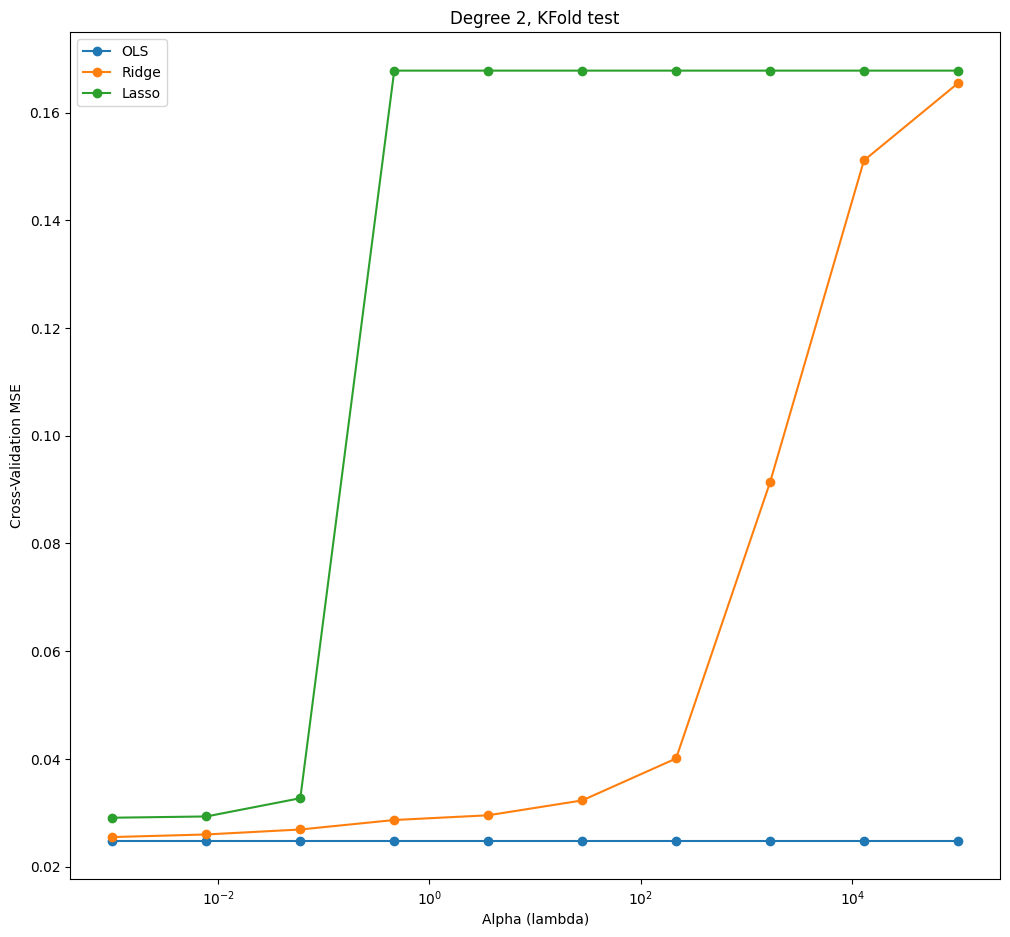

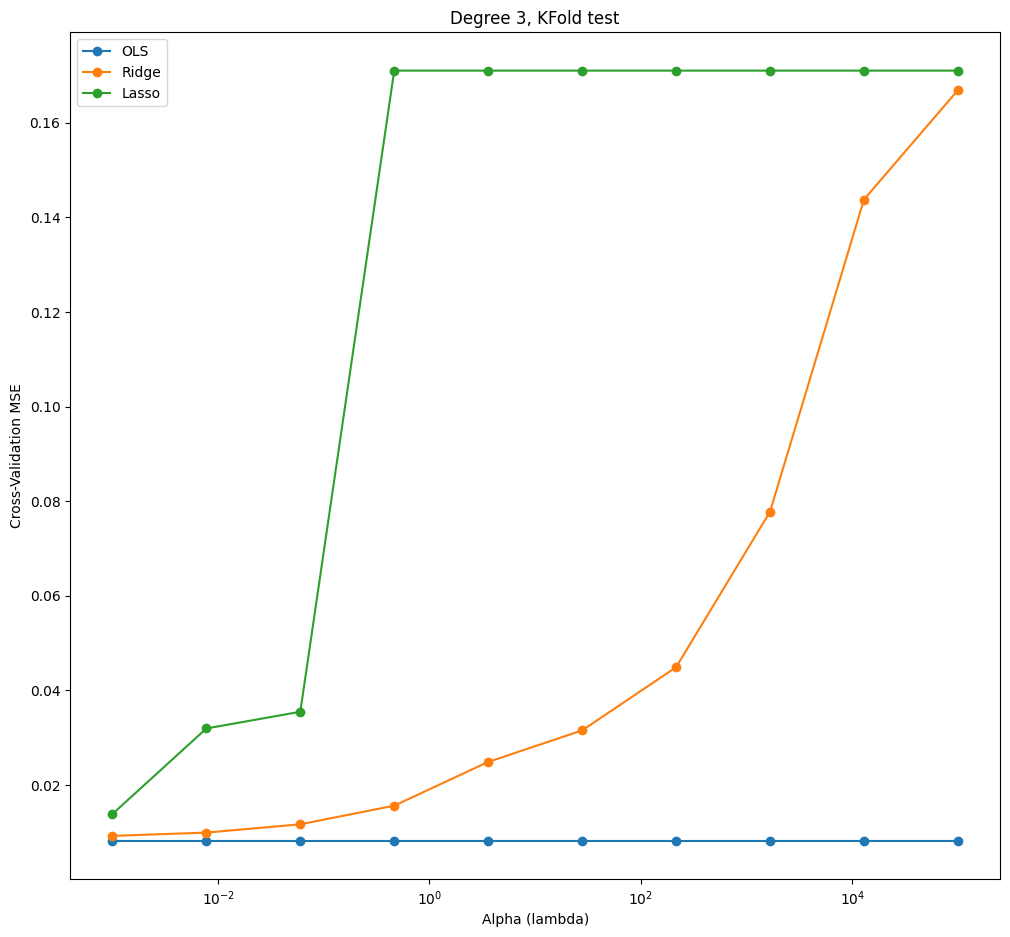

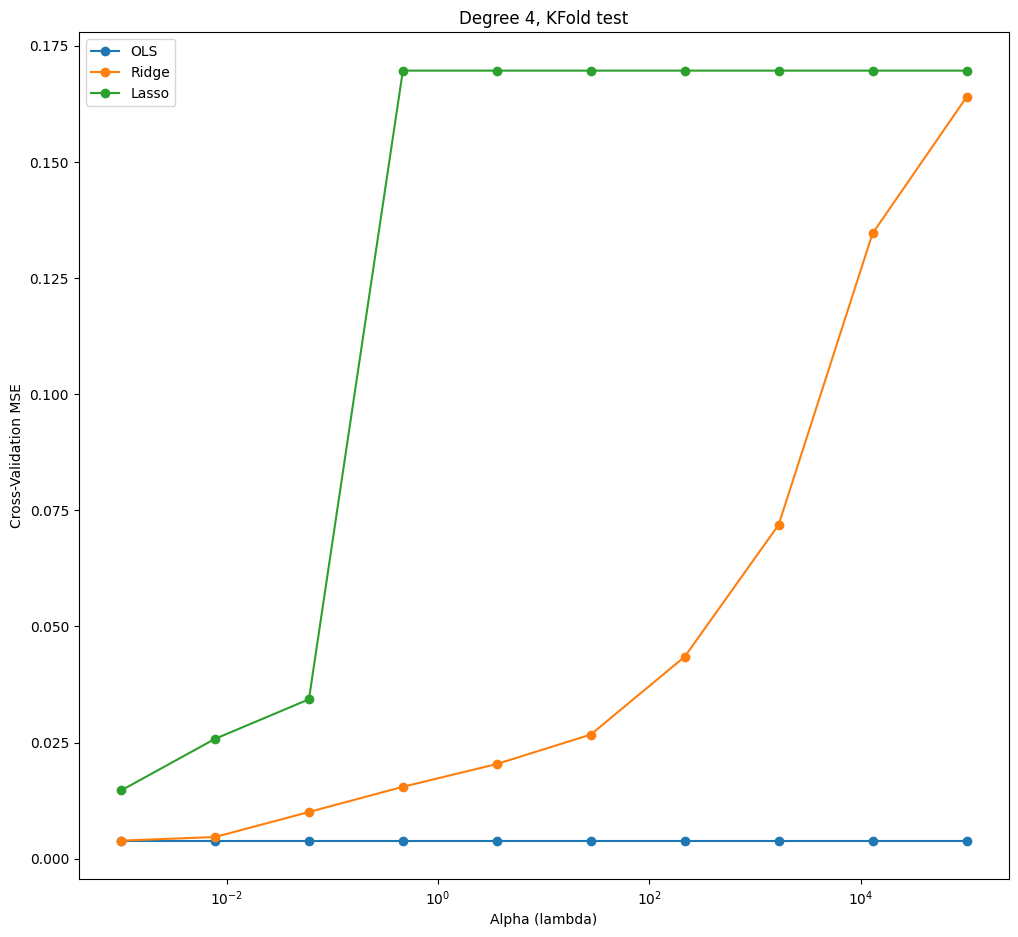

In [10]:
### Step F

import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning

def FrankeFunction(x,y):
	term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
	term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
	term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
	term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
	return term1 + term2 + term3 + term4

    


def create_X(x, y, n ):
	if len(x.shape) > 1:
		x = np.ravel(x)
		y = np.ravel(y)

	N = len(x)
	l = int((n+1)*(n+2)/2)		# Number of elements in beta
	X = np.ones((N,l))

	for i in range(1,n+1):
		q = int((i)*(i+1)/2)
		for k in range(i+1):
			X[:,q+k] = (x**(i-k))*(y**k)

	return X

def calculate_mse(model, X, y, cv):
    mse_scores = []
    for train_idx, test_idx in cv.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)

    return np.mean(mse_scores)


simplefilter("ignore", category=ConvergenceWarning)
num_folds = 10  # Number of folds for cross-validation
degrees = [0, 1, 2, 3, 4]  # Polynomial degrees to consider
num_lambdas =  10 # List of alpha values for Ridge and Lasso
N = 1000
x = np.sort(np.random.uniform(0, 1, N))
y = np.sort(np.random.uniform(0, 1, N))
z = FrankeFunction(x, y)
lambdas = np.logspace(-3,5, num_lambdas)

cv_results_ols_train = []
cv_results_ridge_train = []
cv_results_lasso_train = []

cv_results_ols_test = []
cv_results_ridge_test = []
cv_results_lasso_test = []

for degree in degrees:
    X = create_X(x, y, degree)
    X_train, X_test, y_train, y_test = train_test_split(X,z,test_size=0.2)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    for alpha in lambdas:
        ridge_model = Ridge(alpha=alpha)
        lasso_model = Lasso(alpha=alpha)

        kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

        mse_ols = calculate_mse(LinearRegression(), X_train_scaled, y_train, kf)
        mse_ridge = calculate_mse(ridge_model, X_train_scaled, y_train, kf)
        mse_lasso = calculate_mse(lasso_model, X_train_scaled, y_train, kf)

        cv_results_ols_train.append(mse_ols)
        cv_results_ridge_train.append(mse_ridge)
        cv_results_lasso_train.append(mse_lasso)

        mse_ols = calculate_mse(LinearRegression(), X_test_scaled, y_test, kf)
        mse_ridge = calculate_mse(ridge_model, X_test_scaled, y_test, kf)
        mse_lasso = calculate_mse(lasso_model, X_test_scaled, y_test, kf)

        cv_results_ols_test.append(mse_ols)
        cv_results_ridge_test.append(mse_ridge)
        cv_results_lasso_test.append(mse_lasso)


estimated_mse_sklearn_ols_train = []
estimated_mse_sklearn_ridge_train = []
estimated_mse_sklearn_lasso_train = []

estimated_mse_sklearn_ols_test = []
estimated_mse_sklearn_ridge_test = []
estimated_mse_sklearn_lasso_test = []
for degree in degrees:
    i = 0
    X = create_X(x, y, degree)
    X_train, X_test, y_train, y_test = train_test_split(X,z,test_size=0.2)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    for alpha in lambdas:

        ridge = Ridge(alpha = alpha)
        lasso = Lasso(alpha = alpha)

        kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

        estimated_mse_folds_ols   = cross_val_score(LinearRegression(), X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=kf)
        estimated_mse_folds_ridge = cross_val_score(ridge, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=kf)
        estimated_mse_folds_lasso = cross_val_score(lasso, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=kf)

        # cross_val_score return an array containing the estimated negative mse for every fold.
        # we have to the the mean of every array in order to get an estimate of the mse of the model
        estimated_mse_sklearn_ols_train.append(np.mean(-estimated_mse_folds_ols))
        estimated_mse_sklearn_ridge_train.append(np.mean(-estimated_mse_folds_ridge))
        estimated_mse_sklearn_lasso_train.append(np.mean(-estimated_mse_folds_lasso))

        estimated_mse_folds_ols   = cross_val_score(LinearRegression(), X_test_scaled, y_test, scoring='neg_mean_squared_error', cv=kf)
        estimated_mse_folds_ridge = cross_val_score(ridge, X_test_scaled, y_test, scoring='neg_mean_squared_error', cv=kf)
        estimated_mse_folds_lasso = cross_val_score(lasso, X_test_scaled, y_test, scoring='neg_mean_squared_error', cv=kf)

        # cross_val_score return an array containing the estimated negative mse for every fold.
        # we have to the the mean of every array in order to get an estimate of the mse of the model
        estimated_mse_sklearn_ols_test.append(np.mean(-estimated_mse_folds_ols))
        estimated_mse_sklearn_ridge_test.append(np.mean(-estimated_mse_folds_ridge))
        estimated_mse_sklearn_lasso_test.append(np.mean(-estimated_mse_folds_lasso))

        i += 1

#Reshaping test and train mse for plotting for kfold
cv_results_ols_train = np.array(cv_results_ols_train).reshape(len(degrees), len(lambdas))
cv_results_ridge_train = np.array(cv_results_ridge_train).reshape(len(degrees), len(lambdas))
cv_results_lasso_train = np.array(cv_results_lasso_train).reshape(len(degrees), len(lambdas))

cv_results_ols_test = np.array(cv_results_ols_test).reshape(len(degrees), len(lambdas))
cv_results_ridge_test = np.array(cv_results_ridge_test).reshape(len(degrees), len(lambdas))
cv_results_lasso_test = np.array(cv_results_lasso_test).reshape(len(degrees), len(lambdas))

#Reshaping test and train mse for plotting for cross_val_score
cv_results_ols_sklearn_train = np.array(estimated_mse_sklearn_ols_train).reshape(len(degrees), len(lambdas))
cv_results_ridge_sklearn_train = np.array(estimated_mse_sklearn_ridge_train).reshape(len(degrees), len(lambdas))
cv_results_lasso_sklearn_train = np.array(estimated_mse_sklearn_lasso_train).reshape(len(degrees), len(lambdas))

cv_results_ols_sklearn_test = np.array(estimated_mse_sklearn_ols_test).reshape(len(degrees), len(lambdas))
cv_results_ridge_sklearn_test = np.array(estimated_mse_sklearn_ridge_test).reshape(len(degrees), len(lambdas))
cv_results_lasso_sklearn_test = np.array(estimated_mse_sklearn_lasso_test).reshape(len(degrees), len(lambdas))



for i, degree in enumerate(degrees):
    plt.figure(figsize=(12, 11))

    plt.semilogx(lambdas, cv_results_ols_test[i], marker='o', label='OLS')
    plt.semilogx(lambdas, cv_results_ridge_test[i], marker='o', label='Ridge')
    plt.semilogx(lambdas, cv_results_lasso_test[i], marker='o', label='Lasso')
    plt.title(f'Degree {degree}, KFold test')
    plt.xlabel('Alpha (lambda)')
    plt.ylabel('Cross-Validation MSE')
    plt.legend()
    plt.show()

plt.show()




[15.45317624 15.45317624 15.45317624 15.45317624 15.45317624 15.45317624
 15.45317624 15.45317624 15.45317624 15.45317624]
[16.43663388 16.43663388 16.43663388 16.43663388 16.43663388 16.43663388
 16.43663388 16.43663388 16.43663388 16.43663388]
[15.62400924 15.62400924 15.62400924 15.62400924 15.62400924 15.62400924
 15.62400924 15.62400924 15.62400924 15.62400924]
[15.83694096 15.83694096 15.83694096 15.83694096 15.83694096 15.83694096
 15.83694096 15.83694096 15.83694096 15.83694096]
[15.98153068 15.98153068 15.98153068 15.98153068 15.98153068 15.98153068
 15.98153068 15.98153068 15.98153068 15.98153068]


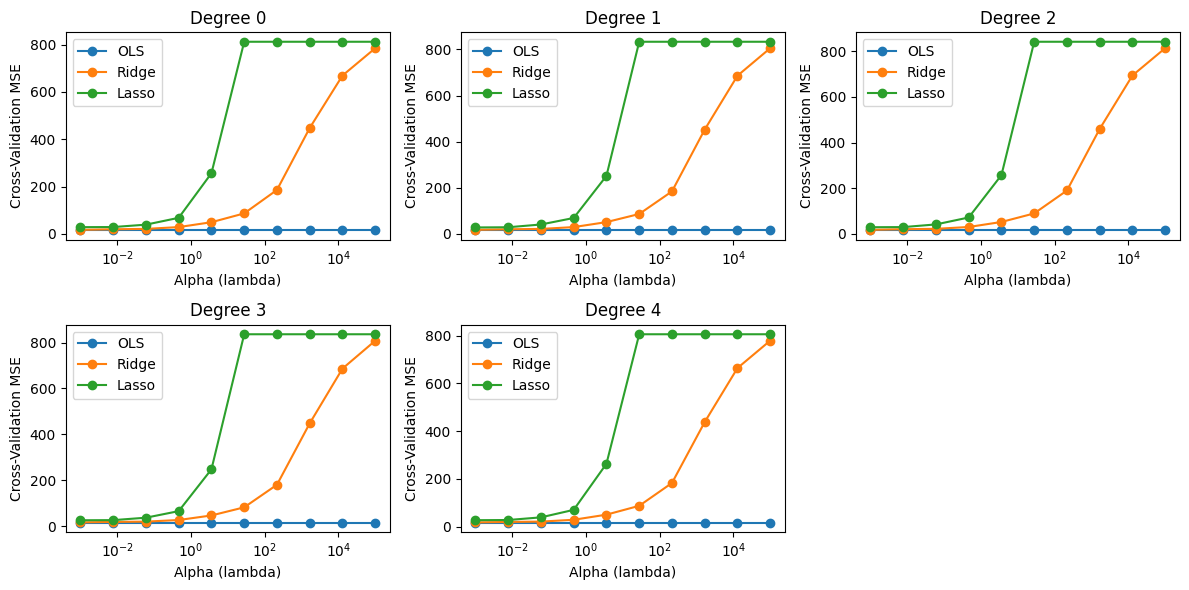

[19.22150387 19.22150387 19.22150387 19.22150387 19.22150387 19.22150387
 19.22150387 19.22150387 19.22150387 19.22150387]
[16.26673447 16.26673447 16.26673447 16.26673447 16.26673447 16.26673447
 16.26673447 16.26673447 16.26673447 16.26673447]
[20.30829863 20.30829863 20.30829863 20.30829863 20.30829863 20.30829863
 20.30829863 20.30829863 20.30829863 20.30829863]
[24.0064849 24.0064849 24.0064849 24.0064849 24.0064849 24.0064849
 24.0064849 24.0064849 24.0064849 24.0064849]
[18.6504086 18.6504086 18.6504086 18.6504086 18.6504086 18.6504086
 18.6504086 18.6504086 18.6504086 18.6504086]


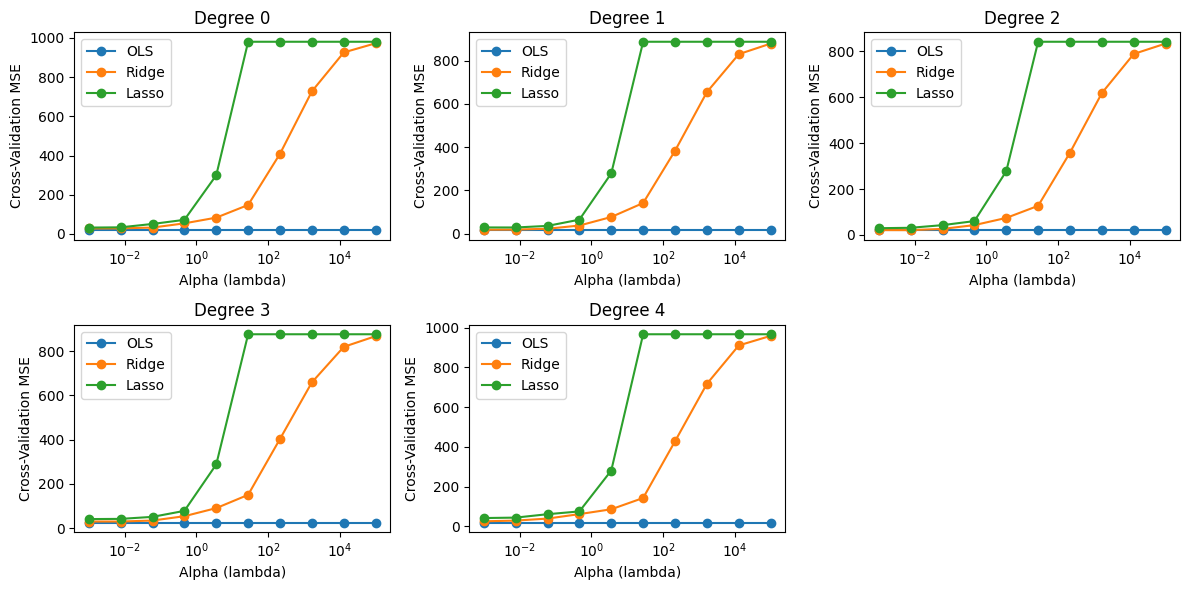

In [11]:

### Step g
import numpy as np
from imageio.v2 import imread
import matplotlib.pyplot as plt
from sklearn.model_selection import  train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning

def create_X(x, y, n ):
	if len(x.shape) > 1:
		x = np.ravel(x)
		y = np.ravel(y)

	N = len(x)
	l = int((n+1)*(n+2)/2)		# Number of elements in beta
	X = np.ones((N,l))

	for i in range(1,n+1):
		q = int((i)*(i+1)/2)
		for k in range(i+1):
			X[:,q+k] = (x**(i-k))*(y**k)

	return X


def calculate_mse(model, X, y, cv):
    mse_scores = []
    for train_idx, test_idx in cv.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)

    return np.mean(mse_scores)

simplefilter("ignore", category=ConvergenceWarning)
# Load the terrain data
terrain_data = imread('SRTM_data_Norway_1.tif')
N = 25
m = 5 # polynomial order
degrees = [0, 1, 2, 3, 4]
num_lambdas = 10
terrain = terrain_data[:N,:N]
# Creates mesh of image pixels
x = np.linspace(0,1, np.shape(terrain)[0])
y = np.linspace(0,1, np.shape(terrain)[1])
x_mesh, y_mesh = np.meshgrid(x,y)

lambdas = np.logspace(-3,5, num_lambdas)

x_mesh = np.ravel(x_mesh)
y_mesh = np.ravel(y_mesh)


z = terrain
z = np.ravel(z)


cv_results_ols_train = []
cv_results_ridge_train = []
cv_results_lasso_train = []

cv_results_ols_test = []
cv_results_ridge_test = []
cv_results_lasso_test = []

for degree in range(m):
    #Create the design matrix and scale the data
    X = create_X(x_mesh, y_mesh, m)
    X_train, X_test, y_train, y_test = train_test_split(X,z,test_size=0.2)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
	
    # for each lambda calculate the mse for train and test data
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    for alpha in lambdas:
        ridge_model = Ridge(alpha=alpha)
        lasso_model = Lasso(alpha=alpha)

        mse_ols = calculate_mse(LinearRegression(), X_train_scaled, y_train, kf)
        mse_ridge = calculate_mse(ridge_model, X_train_scaled, y_train, kf)
        mse_lasso = calculate_mse(lasso_model, X_train_scaled, y_train, kf)

        cv_results_ols_train.append(mse_ols)
        cv_results_ridge_train.append(mse_ridge)
        cv_results_lasso_train.append(mse_lasso)

        mse_ols = calculate_mse(LinearRegression(), X_test_scaled, y_test, kf)
        mse_ridge = calculate_mse(ridge_model, X_test_scaled, y_test, kf)
        mse_lasso = calculate_mse(lasso_model, X_test_scaled, y_test, kf)

        cv_results_ols_test.append(mse_ols)
        cv_results_ridge_test.append(mse_ridge)
        cv_results_lasso_test.append(mse_lasso)
	
# Reshape the data
cv_results_ols_train = np.array(cv_results_ols_train).reshape(len(degrees), len(lambdas))
cv_results_ridge_train = np.array(cv_results_ridge_train).reshape(len(degrees), len(lambdas))
cv_results_lasso_train = np.array(cv_results_lasso_train).reshape(len(degrees), len(lambdas))

cv_results_ols_test = np.array(cv_results_ols_test).reshape(len(degrees), len(lambdas))
cv_results_ridge_test = np.array(cv_results_ridge_test).reshape(len(degrees), len(lambdas))
cv_results_lasso_test = np.array(cv_results_lasso_test).reshape(len(degrees), len(lambdas))

plt.figure(figsize=(12, 6))

# Plot the data
for i, degree in enumerate(degrees):
    plt.subplot(2, 3, i + 1)
    plt.semilogx(lambdas, cv_results_ols_train[i], marker='o', label='OLS')
    print(cv_results_ols_train[i])
    plt.semilogx(lambdas, cv_results_ridge_train[i], marker='o', label='Ridge')
    plt.semilogx(lambdas, cv_results_lasso_train[i], marker='o', label='Lasso')
    plt.title(f'Degree {degree}')
    plt.xlabel('Alpha (lambda)')
    plt.ylabel('Cross-Validation MSE')
    plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))

for i, degree in enumerate(degrees):
    plt.subplot(2, 3, i + 1)
    plt.semilogx(lambdas, cv_results_ols_test[i], marker='o', label='OLS')
    print(cv_results_ols_test[i])
    plt.semilogx(lambdas, cv_results_ridge_test[i], marker='o', label='Ridge')
    plt.semilogx(lambdas, cv_results_lasso_test[i], marker='o', label='Lasso')
    plt.title(f'Degree {degree}')
    plt.xlabel('Alpha (lambda)')
    plt.ylabel('Cross-Validation MSE')
    plt.legend()

plt.tight_layout()
plt.show()